In [2]:
# !pip install kagglehub
# !pip install llama-cpp-python
# !pip install sentence-transformers
# !pip install sentence_transformers
# !pip install ftfy
# !pip install ace_tools
# !pip install transformers torch

# # Download latest version
# path = kagglehub.dataset_download("deepshah16/song-lyrics-dataset")

# print("Path to dataset files:", path)

#### imports

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import pipeline
from llama_cpp import Llama
from sentence_transformers import SentenceTransformer, util

c:\ProgramData\Anaconda3\envs\py\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load the data

In [ ]:
# Directory containing the files
directory_path = "./Data"  

dataframes = []

# Loop through all files in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    
    if os.path.isfile(file_path) and file_name.endswith('.csv'):
        df = pd.read_csv(file_path, encoding='utf-8')
        dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df.head())

# Save the combined data to a new file if needed
# combined_df.to_csv("combined_data.csv", index=False)

          Artist                   Title            Album        Date  \
0  Ariana Grande          ​thank u, next    thank u, next  2018-11-03   
1  Ariana Grande                 7 rings    thank u, next  2019-01-18   
2  Ariana Grande         ​God is a woman        Sweetener  2018-07-13   
3  Ariana Grande            Side To Side  Dangerous Woman  2016-05-20   
4  Ariana Grande  ​​no tears left to cry        Sweetener  2018-04-20   

                                               Lyric  Year  Unnamed: 0  
0  thought i'd end up with sean but he wasn't a m...  2018         NaN  
1  yeah breakfast at tiffany's and bottles of bub...  2019         NaN  
2  you you love it how i move you you love it how...  2018         NaN  
3  ariana grande  nicki minaj i've been here all ...  2016         NaN  
4  right now i'm in a state of mind i wanna be in...  2018         NaN  


#### Load the Model

In [ ]:
from llama_cpp import Llama

# Path to downloaded model
model_path = "C:/Users/20201708/.lmstudio/models/mradermacher/Pegasus-7b-slerp-GGUF/Pegasus-7b-slerp.Q4_K_S.gguf"

gemma_model = Llama(model_path=model_path)

llama_model_loader: loaded meta data with 48 key-value pairs and 291 tensors from C:/Users/20201708/.lmstudio/models/mradermacher/Pegasus-7b-slerp-GGUF/Pegasus-7b-slerp.Q4_K_S.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Multi_Verse_Model
llama_model_loader: - kv   3:                       general.organization str              = Ammarali32
llama_model_loader: - kv   4:                           general.finetune str              = slerp
llama_model_loader: - kv   5:                           general.basename str              = Pegasus
llama_model_loader: - kv   6:                         general.size_label str           

### Running the Model

#### Examples

In [4]:
pd.set_option("max_colwidth", None)

pm = combined_df[combined_df['Artist'] == "Post Malone"]
pm

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
6451,Post Malone,​​rockstar,beerbongs & bentleys,2017-09-15,post malone hahahahaha tank god ayy ayy post malone i've been fuckin' hoes and poppin' pillies man i feel just like a rockstar star ayy ayy all my brothers got that gas and they always be smokin' like a rasta 'sta fuckin' with me call up on a uzi and show up man them the shottas 'tas when my homies pull up on your block they make that thing go grrratatata ta pow pow pow ayy ayy post malone switch my whip came back in black i'm startin' sayin' rest in peace to bon scott scott ayy close that door we blowin' smoke she ask me light a fire like i'm morrison 'son ayy act a fool on stage prolly leave my fuckin' show in a cop car car ayy shit was legendary threw a tv out the window of the montage cocaine on the table liquor pourin' don't give a damn dude your girlfriend is a groupie she just tryna get in sayin' i'm with the band ayy ayy now she actin' outta pocket tryna grab up on my pants hundred bitches in my trailer say they ain't got a man and they all brought a friend yeah ayy ayy ayy post malone i've been fuckin' hoes and poppin' pillies man i feel just like a rockstar star ayy ayy all my brothers got that gas and they always be smokin' like a rasta 'sta fuckin' with me call up on a uzi and show up man them the shottas 'tas when my homies pull up on your block they make that thing go grrratatata ta pow pow pow savage i've been in the hills fuckin' superstars feelin' like a popstar drankin' henny bad bitches jumpin' in the pool and they ain't got on no bra bra hit her from the back pullin' on her tracks and now she screamin' out no más yeah yeah yeah they like savage why you got a car garage and you only got six cars i ain't with the cakin' how you kiss that kiss that your wifey say i'm lookin' like a whole snack big snack green hundreds in my safe i got old racks old racks la bitches always askin' where the coke at livin' like a rockstar smash out on a cop car sweeter than a poptart you know you are not hard i done made the hot chart 'member i used to trap hard livin' like a rockstar i'm livin' like a rockstar ayy post malone savage i've been fuckin' hoes and poppin' pillies man i feel just like a rockstar star ayy ayy all my brothers got that gas and they always be smokin' like a rasta 'sta yeah yeah yeah yeah fuckin' with me call up on a uzi and show up man them the shottas 'tas when my homies pull up on your block they make that thing go grrratatata ta grrratatatata post malone star star rockstar rockstar star rockstar rockstar feel just like a rock rockstar rockstar rockstar feel just like a,2017.0,0.0
6452,Post Malone,White Iverson,Stoney (Deluxe),2015-02-04,double ot i'm a new three saucin' saucin' i'm saucin' on you i'm swaggin' i'm swaggin' i'm swaggin' ohooh swaggin' i'm ballin' i'm ballin' iverson on you swish ooh ayy watch out watch out watch out yeah that's my shot that's my shot that's my shot yeah spendin' i'm spendin' all my fuckin' pay i got me some braids and i got me some hoes started rockin' the sleeve i can't ball with no joes you know how i do it concords on my toes this shit is hard ooh i ain't rich yet but you know i ain't broke i i ain't broke i so if i see it i like it buy that from the store i that from the store i i'm with some white girls and they lovin' the coca coca like they ot double ot like i'm kd smokin' og smokin' og and you know me in my s and my gold teeth and my gold teeth bitch i'm smiling bet you see me from the nosebleeds nosebleeds i'm a new three and i change out to my new s to my new s pre white iverson when i started ballin' i was young you gon' think about me when i'm gone i need that money like the ring i never won i won saucin' saucin' i'm saucin' on you i'm swaggin' i'm swaggin' i'm swaggin' ohooh i'm ballin' i'm ballin' iverson on you on you on you watch out watch out watch out yeah that's my shot that's my shot that's my shot yeah spendin' i'm spendin' all my fuckin' pay oo

In [7]:
lyrics = "You can love it, you can leave it They say you're nothing without it Don't let them keep you down What if I don't need it? There's something about it That just freaks me out I just want another minute with it, fuck a little, what's the use? Never superficial you gon' know it when it hit you Get a little sentimental when I'm off the juice Yeah, okay we colder than the breeze But the breeze ain't flowin' like me, motherfucker, hol' up You don't need to hol' up, yeah And I can show you how it seem, what it is, what it truly might be Nothing that you know of, you don't need to hol' up I'm so above and beyond you, take drugs to make it up Way up where we on, space shuttle, Elon Time we don't waste much, fuck and we wake up Then I have her sing just like Céline Dion Catch me if you can but, you'll never catch me, damn Whole lotta, 'yes, I am' All the way in with no exit plan Already left and the jet don't land Yeah, the time is ticking Come take a ride, get inside, this is highly different I'm talking fly, got the pilot with me Can I mind my business? Why you trippin'? Give you somethin' that your eyes can witness Ooh, too close I don't understand why you doing the most (ooh) You can love it, you can leave it They'll say you're nothing without it Don't let them keep you down What if I don't need it? There's something about it That just freaks me out I just want another minute with it, fuck a little What's the use? (what's the use?) Never superficial, you gon' know it when it hit you Get a little sentimental when I'm off the juice (turn it up) Well, I'ma give you what you came for, yeah Shit, I've worked too hard to have a clue who you are Set the bar so far above par, we can parlay all day Crib long range with the yard I know I should probably pray more, but you gotta love me 'Cause I save the day, spend money When I had nothing, shit, it wasn't so funny Made a promise to the homies, nobody'd go hungry Look how far we came, still they throwin' dirt on my name But it never worried my brain Heads turnin' like a hurricane swervin' Tell the sun, get up outta my shade They don't get the picture, cut 'em out of my frame, shit I'm up 30 thou miles plus change It's been a while but I'm down 'til I'm out And it is what it is 'til it ain't Ooh, oh, oh I just wanna fly, ah You can love it, you can leave it And say you're nothing without it Don't let them keep you down What if I don't need it? There's something about it That just freaks me out I just want another minute with it, fuck a little What's the use? (what's the use?) Never superficial, you don't know it when it hit you Get a little sentimental when I'm off the juice (ooh) You can love it It just freaks me outt'stheuse?)Neversuperficial,youdon'tknowitwhenithityouGetalittlesentimentalwhenI'moffthejuice(ooh)YoucanloveitItjustfreaksmeout"

# Split the lyrics into tokens (words)
tokens = lyrics.split()

# Truncate to the first 300 (or 512) tokens
truncated_lyrics = " ".join(tokens[:300])

prompt = f"Generate a creative and fitting title for these lyrics. The title should be short and capture the essence of the song:\n\n{truncated_lyrics}"

response = gemma_model(prompt, max_tokens=15)

summary = response["choices"][0]["text"]
print("Generated Summary:", summary)

llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   445 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    14 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   46902.64 ms /   459 tokens


Generated Summary: .
Title: Defying Expectations

The lyrics seem to challenge


In [8]:
response["choices"][0]['text']

'.\nTitle: Defying Expectations\n\nThe lyrics seem to challenge'

In [6]:
import random

#### Actual Model

In [11]:
random.seed(1)

# Select 10 random rows from the DataFrame
pm = combined_df[combined_df['Artist'] == "Post Malone"].sample(n=1)
pm

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
6478,Post Malone,Otherside,beerbongs & bentleys,2018-04-27,i been waitin' wide awake for the waves to come and take take me right to you one hundred bottles of the good shit couldn't even bring you back what am i to do feel like i'm circlin' a drain all i see is the remains of an ugly truth of an ugly truth one hundred models i could follow all the way to hell and back but they can't replace you they can't replace you oh oh oh ohh oh oh oh ohh oh oh oh ohh ohh oh oh oh ohh oh oh oh ohh oh oh oh ohh ohh i was puttin' on for you like a jersey what i didn't know then couldn't hurt me never thought that you'd go and do me dirty left me in the cold but on the inside i was burnin' but that's just the way it goes wish that i could have control everybody dies alone and i ain't dead yet refrain say my prayers but i lost faith a long time ago a long time ago dream nightmares i guess we're gettin' used to losin' hope guess we're losing hope i don't even wonder why you don't answer when i call your name are you on the other side will you save us or will you run away i'm still waitin' wide awake for the waves to come and take take me right to you take me right to you one hundred vials of denial i know they won't bring you back what am i to do what am i to do youre my alibi and motive when i'm lyin' to myself what an ugly truth what an ugly truth were no strangers to the flame we will never be the same if we make it through and we can make it through my back is up against the wall but i used to feel invincible yeah it was us against the world but somehow someway the tables turned i remember back then played my cards right you were my best hand still you keep me guessin' wonder if i'll ever get the message refrain say my prayers but i lost faith a long time ago a long time ago dream nightmares i guess we're gettin' used to losin' hope guess we're losing hope i don't even wonder why you don't answer when i call your name are you on the other side will you save us or will you run away are you on the other side will you save us or will you run away,2018.0,27.0


In [13]:
random.seed(1)
df_50 = combined_df.sample(1)

In [13]:
pm = combined_df[combined_df['Artist'] == 'Post Malone'].sample(1)
pm

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
6451,Post Malone,​​rockstar,beerbongs & bentleys,2017-09-15,post malone hahahahaha tank god ayy ayy post malone i've been fuckin' hoes and poppin' pillies man i feel just like a rockstar star ayy ayy all my brothers got that gas and they always be smokin' like a rasta 'sta fuckin' with me call up on a uzi and show up man them the shottas 'tas when my homies pull up on your block they make that thing go grrratatata ta pow pow pow ayy ayy post malone switch my whip came back in black i'm startin' sayin' rest in peace to bon scott scott ayy close that door we blowin' smoke she ask me light a fire like i'm morrison 'son ayy act a fool on stage prolly leave my fuckin' show in a cop car car ayy shit was legendary threw a tv out the window of the montage cocaine on the table liquor pourin' don't give a damn dude your girlfriend is a groupie she just tryna get in sayin' i'm with the band ayy ayy now she actin' outta pocket tryna grab up on my pants hundred bitches in my trailer say they ain't got a man and they all brought a friend yeah ayy ayy ayy post malone i've been fuckin' hoes and poppin' pillies man i feel just like a rockstar star ayy ayy all my brothers got that gas and they always be smokin' like a rasta 'sta fuckin' with me call up on a uzi and show up man them the shottas 'tas when my homies pull up on your block they make that thing go grrratatata ta pow pow pow savage i've been in the hills fuckin' superstars feelin' like a popstar drankin' henny bad bitches jumpin' in the pool and they ain't got on no bra bra hit her from the back pullin' on her tracks and now she screamin' out no más yeah yeah yeah they like savage why you got a car garage and you only got six cars i ain't with the cakin' how you kiss that kiss that your wifey say i'm lookin' like a whole snack big snack green hundreds in my safe i got old racks old racks la bitches always askin' where the coke at livin' like a rockstar smash out on a cop car sweeter than a poptart you know you are not hard i done made the hot chart 'member i used to trap hard livin' like a rockstar i'm livin' like a rockstar ayy post malone savage i've been fuckin' hoes and poppin' pillies man i feel just like a rockstar star ayy ayy all my brothers got that gas and they always be smokin' like a rasta 'sta yeah yeah yeah yeah fuckin' with me call up on a uzi and show up man them the shottas 'tas when my homies pull up on your block they make that thing go grrratatata ta grrratatatata post malone star star rockstar rockstar star rockstar rockstar feel just like a rock rockstar rockstar rockstar feel just like a,2017.0,0.0


In [ ]:
# Load the SentenceTransformer model
model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

summaries = []
num_guesses = 3 

for index, row in pm.iterrows():
    artist = row['Artist']
    title = row['Title']
    lyrics = row['Lyric']

    prompt_fixed = (
        "Analyze the following song lyrics and generate a concise title using only words or phrases that appear directly in the lyrics:\n\n"
        "\n\nTitle:"
    )
    available_tokens = 512 - len(prompt_fixed.split())

    # Truncate lyrics dynamically
    tokens = lyrics.split()
    truncated_lyrics = " ".join(tokens[:available_tokens])

    # Variables to store guesses and their similarity scores
    guesses = []
    similarity_scores = []

    for _ in range(num_guesses):
        # Generate the title
        response = gemma_model(prompt_fixed, max_tokens=5)
        generated_title = response["choices"][0]["text"].strip()

        # Compute embeddings
        actual_embedding = model.encode(title, convert_to_tensor=True)
        generated_embedding = model.encode(generated_title, convert_to_tensor=True)

        # Compute cosine similarity
        similarity_score = util.cos_sim(actual_embedding, generated_embedding).item()

        # Store the guess and its similarity score
        guesses.append(generated_title)
        similarity_scores.append(similarity_score)

    summaries.append({
        'Artist': artist,
        'Actual Title': title,
        'Guess 1': f"{guesses[0]} (Score: {similarity_scores[0]:.2f})",
        'Guess 2': f"{guesses[1]} (Score: {similarity_scores[1]:.2f})",
        'Guess 3': f"{guesses[2]} (Score: {similarity_scores[2]:.2f})"
    })

output_df = pd.DataFrame(summaries)
output_df


Llama.generate: 31 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    5275.37 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     5 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1693.48 ms /     6 tokens
Llama.generate: 31 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    5275.37 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     5 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1794.02 ms /     6 tokens
Llama.generate: 31 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_contex

,Artist,Actual Title,Guess 1,Guess 2,Guess 3
0,Post Malone,​​rockstar,Strawberry Blonde (Score: 0.20),Lost Generation Dreams (Score: 0.29),Strangers Again Tonight (Score: 0.26)


#### Model with 4 runs that selects the best predicted title

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

summaries = []
num_runs = 4  # Number of runs to generate multiple predictions

for index, row in combined_df.iterrows():
    artist = row['Artist']
    title = row['Title']
    lyrics = row['Lyric']

    # Truncate lyrics
    tokens = lyrics.split()
    truncated_lyrics = " ".join(tokens[:300])

    prompt = (
        f"Analyze the following song lyrics and generate a concise title using only words or phrases that appear directly in the lyrics:\n\n"
        f"{truncated_lyrics}\n\n"
        "Title:"
    )

    # Variables to track the best prediction
    best_generated_title = None
    highest_similarity = -1  

    for _ in range(num_runs):
        # Generate the title
        response = gemma_model(prompt, max_tokens=5)
        generated_title = response["choices"][0]["text"].strip()

        # Compute embeddings
        actual_embedding = model.encode(title, convert_to_tensor=True)
        generated_embedding = model.encode(generated_title, convert_to_tensor=True)

        # Compute cosine similarity
        similarity_score = util.cos_sim(actual_embedding, generated_embedding).item()

        # Update the best prediction if this one is better
        if similarity_score > highest_similarity:
            best_generated_title = generated_title
            highest_similarity = similarity_score

    summaries.append({
        'Artist': artist,
        'Title': title,
        'Best Summary': best_generated_title,
        'Similarity': highest_similarity
    })

summary_df = pd.DataFrame(summaries)
summary_df


Llama.generate: 28 prefix-match hit, remaining 383 prompt tokens to eval
llama_perf_context_print:        load time =   38506.97 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   383 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   34172.83 ms /   387 tokens
Llama.generate: 410 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =   38506.97 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     5 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1659.72 ms /     6 tokens
Llama.generate: 410 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_co

#### Calculating similarity between predicted title and actual title

In [269]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

data = [
    {"Actual": "Rockstar", "Predicted": "Party Animal"},
    {"Actual": "Love Story", "Predicted": "Romantic Tale"},
    {"Actual": "Summer Vibes", "Predicted": "Beach Party"}
]


c:\ProgramData\Anaconda3\envs\py\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\20201708\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


         Actual      Predicted  Similarity
0      Rockstar   Party Animal    0.202450
1    Love Story  Romantic Tale    0.825797
2  Summer Vibes    Beach Party    0.370211


#### Augmenting application of model

In [31]:
random.seed(1)

# Select 10 random rows from the DataFrame
pm = combined_df[combined_df['Artist'] == "Post Malone"].sample(n=1)
pm

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
6520,Post Malone,God Damn,August 26th,2016-05-12,post malone st god damn god damn yeah ooh god damn yeah god damn god damn good job first post malone st god damn where the hell you get that from saucin' on them hoes 'cause that ass so dumb yeah everyone here wanna hit that yum god damn yeah yeah god damn where the hell you get that from saucin' on them hoes 'cause my ice so dumb yeah everyone know 'bout my bread got some god damn yeah yeah god damn post malone bustin' out the hoo hey woah i just keep on blastin' out the pussy and god damn bustin' out the hoo hey uh i just fucked my bitch rockin' stüssy yeah ooh drop a modicum of sauce she really ain't shit bitch i dropped it all off hit the strip club and blow it all off top 'cause i will never love a damn ho in my life post malone st god damn where the hell you get that from saucin' on them hoes 'cause that ass so dumb yeah everyone here wanna hit that yum god damn yeah yeah god damn where the hell you get that from saucin' on them hoes 'cause my ice so dumb yeah everyone know 'bout my bread got some god damn yeah yeah god damn st ayy it's st haha you know what i do hold up okay i pulled up dropped the top everybody looking wonder who i am who she get out ass big everybody looking like god damn and she say she want a nigga who can handle everything with other men that's me then she topped me off and turned around said take it daddy so i went super saiyan huh flavor last forever any bitches know you weak lame i'm so in love with making money that i can't sleep excuse me sir can i have my sauce back please tryna run off with my sauce you need to bring it back post malone st god damn where the hell you get that from saucin' on them hoes 'cause that ass so dumb yeah everyone here wanna hit that yum god damn yeah yeah god damn where the hell you get that from saucin' on them hoes 'cause my ice so dumb everyone know 'bout my bread got some god damn yeah yeah god,2016.0,69.0


In [44]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

# Define multiple prompts
prompts = [
    "Based on the following lyrics, generate a title that captures the essence of the song. Use only words or phrases directly from the lyrics:\n\n{lyrics}\n\nTitle:",
    "Analyze the following song lyrics and generate a concise, creative title that reflects the song's main theme or mood. Use only words found in the lyrics:\n\n{lyrics}\n\nTitle:",
    "Create a song title that reflects the emotions and themes in the following lyrics. Ensure the title is concise and made up of words or phrases found in the lyrics:\n\n{lyrics}\n\nTitle:",
    "From the following lyrics, identify the most important phrases and generate a title that represents the song. Use only words present in the lyrics:\n\n{lyrics}\n\nTitle:"
]

results = []

# Iterate over the dataset
for index, row in df_50.iterrows():
    artist = row['Artist']
    title = row['Title']
    lyrics = row['Lyric']

    # Truncate lyrics
    tokens = lyrics.split()
    truncated_lyrics = " ".join(tokens[:300])

    best_prompt = None
    best_title = None
    highest_similarity = -1

    # Test each prompt
    for prompt_template in prompts:
        # Fill in the lyrics into the prompt
        prompt = prompt_template.format(lyrics=truncated_lyrics)

        # Generate the title
        response = gemma_model(prompt, max_tokens=5)
        generated_title = response["choices"][0]["text"].strip()

        # Compute embeddings
        actual_embedding = model.encode(title, convert_to_tensor=True)
        generated_embedding = model.encode(generated_title, convert_to_tensor=True)

        # Compute cosine similarity
        similarity_score = util.cos_sim(actual_embedding, generated_embedding).item()

        # Update the best prompt if this one performs better
        if similarity_score > highest_similarity:
            highest_similarity = similarity_score
            best_prompt = prompt_template
            best_title = generated_title

    results.append({
        'Artist': artist,
        'Actual Title': title,
        'Best Generated Title': best_title,
        'Best Prompt': best_prompt,
        'Highest Similarity': highest_similarity
    })

results_df = pd.DataFrame(results)

print(results_df)

# Calculate the average similarity for each prompt
average_similarities = {}
for prompt_template in prompts:
    prompt_results = [row['Highest Similarity'] for row in results if row['Best Prompt'] == prompt_template]
    average_similarities[prompt_template] = sum(prompt_results) / len(prompt_results)

for prompt, avg_sim in average_similarities.items():
    print(f"Prompt: {prompt}\nAverage Similarity: {avg_sim:.4f}\n")


Llama.generate: 1 prefix-match hit, remaining 408 prompt tokens to eval
llama_perf_context_print:        load time =   24133.80 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   408 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   26410.66 ms /   412 tokens
Llama.generate: 1 prefix-match hit, remaining 414 prompt tokens to eval
llama_perf_context_print:        load time =   24133.80 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   414 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   28593.27 ms /   418 tokens
Llama.generate: 1 prefix-match hit, remaining 413 prompt tokens to eval
llama_perf_con

ValueError: Requested tokens (861) exceed context window of 512

### artist, title, predicted title, semantic similarity, title emotion score, predicted title emotion score. 

In [36]:
random.seed(1)

# Select 10 random rows from the DataFrame
pm = combined_df[combined_df['Artist'] == "Post Malone"].sample(n=3)
df_50 = combined_df.sample(n=100)
df_50


Artist                                                 Title  \
8971          Eminem                           The Real Slim Shady (Clean)   
6167     Nicki Minaj                                             Chun Swae   
10776    Nicki Minaj                  Four door aventador - target version   
1927   Ariana Grande                                          Sniffer Dogs   
11489   Selena Gomez                                     Love Me Tomorrow*   
...              ...                                                   ...   
783    Billie Eilish                                       ​bad guy (Demo)   
4186      Ed Sheeran                  Best Part of Me (Live At Abbey Road)   
10972    Post Malone                                        Enemies (Demo)   
4646          Eminem                       Superman (Cry Me A River Remix)   
9767      Katy Perry  I Kissed a Girl (Jason Nevins Funkrokr Extended Mix)   

                       Album        Date  \
8971             The Singles  2000-05-16   
6167   Queen (Bonus Version)  2018-08-10   
10776                    NaN         NaN   
1927                     NaN        None   
11489                    NaN         NaN   
...                      ...         ...   
783         Unreleased Songs         NaN   
4186                     NaN  2019-07-10   
10972       Unreleased Songs         NaN   
4646                     NaN  2003-01-27   
9767    I Kissed a Girl - EP         NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [37]:
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
import ftfy
import unicodedata
import pandas as pd

model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

# Load the RoBERTa-based sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def robust_normalize_text(text):
    # Fix common symbols
    text = text.replace("&", "and").replace("@", "at")
    
    # Normalize Unicode characters (retain only letters and numbers)
    text = ''.join(
        char if unicodedata.category(char).startswith(('L', 'N')) else ' '
        for char in text
    )
    
    # Fix encoding issues
    text = ftfy.fix_text(text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

# Step 2: Define the sentiment scoring function using weighted sum
def emotion_score_weighted(sentiment_output):
    # Define weights for each star rating
    weights = {
        "1 star": -1.0,
        "2 stars": -0.5,
        "3 stars": 0.0,
        "4 stars": 0.5,
        "5 stars": 1.0
    }
    
    # Compute the weighted sum of scores
    continuous_score = sum(weights[item['label']] * item['score'] for item in sentiment_output)
    return continuous_score

# Step 3: Process the entire DataFrame
def process_dataframe(df):
    results = []
    for index, row in df.iterrows():
        try:
            artist = row['Artist']
            title = row['Title']
            lyrics = str(row['Lyric'])  # Ensure lyrics is a string

            # Define the fixed part of the prompt
            prompt_fixed = (
                "Analyze the following song lyrics and generate a concise title using only words or phrases that appear directly in the lyrics:\n\n"
                "\n\nTitle:"
            )

            prompt_tokens = len(prompt_fixed.split())
            available_tokens = 400 - prompt_tokens  # Ensure total tokens (prompt + lyrics) do not exceed 512

            tokens = lyrics.split()
            truncated_lyrics = " ".join(tokens[:available_tokens])

            prompt = f"Analyze the following song lyrics and generate a concise title using only words or phrases that appear directly in the lyrics:\n\n{truncated_lyrics}\n\nTitle:"

            # Generate the title
            response = gemma_model(prompt, max_tokens=5)
            generated_title = response["choices"][0]["text"].strip()

            # Compute semantic similarity
            actual_embedding = model.encode(title, convert_to_tensor=True)
            predicted_embedding = model.encode(generated_title, convert_to_tensor=True)
            similarity_score = util.cos_sim(actual_embedding, predicted_embedding).item()

            # Perform sentiment analysis for the actual and predicted titles
            actual_sentiment_output = sentiment_analyzer(title)
            predicted_sentiment_output = sentiment_analyzer(generated_title)

            # Compute emotion scores for the actual and predicted titles using the weighted method
            actual_emotion_score = emotion_score_weighted(actual_sentiment_output)
            predicted_emotion_score = emotion_score_weighted(predicted_sentiment_output)

            # Store results in a dictionary
            result = {
                'Artist': artist,
                'Title': title,
                'Predicted Title': generated_title,
                'Semantic Similarity': similarity_score,
                'Title Emotion Score': actual_emotion_score,
                'Predicted Title Emotion Score': predicted_emotion_score
            }

            results.append(result)

        except Exception as e:
            print(f"Skipping row {index} due to error: {e}")

    output_df = pd.DataFrame(results)
    return output_df

output_df = process_dataframe(df_50)
output_df

Device set to use cpu
Llama.generate: 28 prefix-match hit, remaining 470 prompt tokens to eval


Skipping row 8971 due to error: Requested tokens (520) exceed context window of 512
Skipping row 6167 due to error: Requested tokens (577) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   470 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   50850.23 ms /   474 tokens
Llama.generate: 28 prefix-match hit, remaining 16 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    16 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    3271.21 ms /    20 tokens
Llama.generate: 28 prefix-match hit, remaining 14 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: p

Skipping row 5149 due to error: Requested tokens (534) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 343 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   343 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   32674.14 ms /   347 tokens


Skipping row 11227 due to error: Requested tokens (550) exceed context window of 512
Skipping row 7180 due to error: Requested tokens (520) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 438 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   438 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   47731.07 ms /   442 tokens
Llama.generate: 28 prefix-match hit, remaining 121 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   121 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   12477.39 ms /   125 tokens
Llama.generate: 28 prefix-match hit, remaining 226 prompt tokens to eval
llama_perf_

Skipping row 983 due to error: Requested tokens (1282) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   186 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   13247.95 ms /   190 tokens
Llama.generate: 28 prefix-match hit, remaining 462 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   462 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   41659.63 ms /   466 tokens
Llama.generate: 28 prefix-match hit, remaining 332 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 6720 due to error: Requested tokens (529) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 435 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   435 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   46311.61 ms /   439 tokens
Llama.generate: 28 prefix-match hit, remaining 446 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   446 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   55799.41 ms /   450 tokens
Llama.generate: 28 prefix-match hit, remaining 453 prompt tokens to eval
llama_perf_

Skipping row 553 due to error: Requested tokens (527) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    6030.52 ms /    27 tokens
Llama.generate: 28 prefix-match hit, remaining 457 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   457 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   63259.75 ms /   461 tokens
Llama.generate: 28 prefix-match hit, remaining 281 prompt tokens to eval
llama_perf_c

Skipping row 3301 due to error: Requested tokens (527) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 455 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   455 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   61951.00 ms /   459 tokens
Llama.generate: 28 prefix-match hit, remaining 454 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   454 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   44015.71 ms /   458 tokens
Llama.generate: 28 prefix-match hit, remaining 366 prompt tokens to eval
llama_perf_

Skipping row 19 due to error: Requested tokens (525) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   327 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   24483.13 ms /   331 tokens
Llama.generate: 28 prefix-match hit, remaining 216 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   216 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   27020.31 ms /   220 tokens
Llama.generate: 28 prefix-match hit, remaining 196 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 6984 due to error: Requested tokens (530) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 189 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   189 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   28056.50 ms /   193 tokens


Skipping row 7839 due to error: Requested tokens (513) exceed context window of 512
Skipping row 2265 due to error: Requested tokens (549) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 6 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     6 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2364.61 ms /    10 tokens
Llama.generate: 28 prefix-match hit, remaining 405 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   405 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   57633.77 ms /   409 tokens
Llama.generate: 28 prefix-match hit, remaining 452 prompt tokens to eval
llama_perf_co

Skipping row 966 due to error: Requested tokens (622) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2762.89 ms /    27 tokens
Llama.generate: 28 prefix-match hit, remaining 442 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   442 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   37385.55 ms /   446 tokens


Skipping row 2051 due to error: Requested tokens (528) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 475 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   475 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   50950.95 ms /   479 tokens


Skipping row 2585 due to error: Requested tokens (924) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 427 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   427 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   44638.69 ms /   431 tokens


Skipping row 4501 due to error: Requested tokens (569) exceed context window of 512
Skipping row 8421 due to error: Requested tokens (538) exceed context window of 512
Skipping row 149 due to error: Requested tokens (550) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 475 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   475 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   47472.46 ms /   479 tokens
Llama.generate: 28 prefix-match hit, remaining 429 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   429 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   41425.36 ms /   433 tokens


Skipping row 9552 due to error: Requested tokens (595) exceed context window of 512
Skipping row 10774 due to error: Requested tokens (543) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 123 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   123 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   12840.25 ms /   127 tokens
Llama.generate: 28 prefix-match hit, remaining 218 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   218 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22973.52 ms /   222 tokens


Skipping row 4455 due to error: Requested tokens (558) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 341 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   341 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   33106.21 ms /   345 tokens
Llama.generate: 28 prefix-match hit, remaining 43 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    43 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    5564.59 ms /    47 tokens
Llama.generate: 28 prefix-match hit, remaining 376 prompt tokens to eval
llama_perf_c

Skipping row 4646 due to error: Requested tokens (532) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 451 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   451 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   33224.20 ms /   455 tokens


,Artist,Title,Predicted Title,Semantic Similarity,Title Emotion Score,Predicted Title Emotion Score
0,Nicki Minaj,Four door aventador - target version,Funky Four Door,0.609414,0.194120,0.369198
1,Ariana Grande,Sniffer Dogs,N/A,0.230219,-0.233105,-0.261101
2,Selena Gomez,Love Me Tomorrow*,WaitingINSTUDINST,0.178471,0.746037,0.121376
3,Katy Perry,Bullet,Steel-Toed War,0.379381,0.248183,0.136007
4,Maroon 5,If I Never See Your Face Again,Summer FadeINSTINST,0.101154,-0.250108,0.160471
...,...,...,...,...,...,...
72,Justin Bieber,Change Me,"Ready for Change,",0.453120,0.000000,0.504571
73,Billie Eilish,​bad guy (Demo),I'm the Bad,0.578434,-0.268750,-0.360669
74,Ed Sheeran,Best Part of Me (Live At Abbey Road),"Black Hearts, In",0.270907,0.761992,0.435226
75,Post Malone,Enemies (Demo),"Lost Friends, Abund",0.269095,0.137568,0.000000


In [241]:
import pandas as pd

results = pd.read_csv("df50.csv")

results.sort_values("Semantic Similarity", ascending=False, inplace=True)

results["Emotion Score Difference"] = results["Title Emotion Score"] - results["Predicted Title Emotion Score"]

numerical_columns = ['Semantic Similarity', 'Title Emotion Score', 'Predicted Title Emotion Score']

averages = results[numerical_columns].abs().mean()

# Create a summary row
summary_row = {
    'Artist': 'Average',
    'Title': '',
    'Predicted Title': '',
    'Semantic Similarity': averages['Semantic Similarity'],
    'Title Emotion Score': averages['Title Emotion Score'],
    'Predicted Title Emotion Score': averages['Predicted Title Emotion Score'],
    'Emotion Score Difference': results["Emotion Score Difference"].mean()
}

results = results.append(summary_row, ignore_index=True)

results.iloc[[1, 2, 8, 12]]


C:\Users\20201708\AppData\Local\Temp\ipykernel_3660\2188079634.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(summary_row, ignore_index=True)


,Unnamed: 0,Artist,Title,Predicted Title,Semantic Similarity,Title Emotion Score,Predicted Title Emotion Score,Emotion Score Difference
1,28.0,Ariana Grande,​my heart belongs to daddy (live),Heart Belongs to Daddy,0.862453,0.604162,0.480518,0.123644
2,22.0,Rihanna,Rude Boy,Come Here Rude Boy,0.846261,-0.414594,0.507996,-0.922590
8,24.0,Post Malone,Cold,"Frozen for You,",0.601703,-0.156560,0.328371,-0.484930
12,1.0,Charlie Puth,Free,Born to Be Free Wild,0.517928,0.192651,0.494752,-0.302100


#### Comparing 4 prompts

In [43]:
random.seed(1)

# Select 10 random rows from the DataFrame
pm = combined_df[combined_df['Artist'] == "Post Malone"].sample(n=3)
df_50 = combined_df.sample(n=50)
df_50


,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
10429,Maroon 5,This Love (Kanye West Remix),Songs About Jane,NaN,interlude adam levine john legend ohh woah woahh ohh woah woahh adam levine i was so high i did not recognize the fire burning in her eyes the chaos that controlled my mind whispered goodbye as she got on a plane never to return again but always in my heart hook adam levine w john legend vocals oh this love has taken its toll on me she said goodbye too many times before and her heart is breaking in front of me i have no choice 'cause i won't say goodbye anymore interlude adam levine john legend ohh woah woah adam levine i tried my best to feed her appetite keep her coming every night so hard to keep her satisfied oh kept playing love like it was just a game pretending to feel the same then turn around and leave again but hook adam levine w john legend vocals oh this love has taken its toll on me she said goodbye too many times before and her heart is breaking in front of me i have no choice 'cause i won't say goodbye anymore interlude adam levine john legend ohh woah woah adam levine i'll fix these broken things repair your broken wings and make sure everything's alright oh my pressure on your hips sinking my fingertips every inch of you 'cause i know that's what you want me to do hook adam levine w john legend vocals oh this love has taken its toll on me she said goodbye too many times before and her heart is breaking in front of me i have no choice 'cause i won't say goodbye anymore adam levine this love has taken its toll on me she said goodbye too many times before and my heart is breaking in front of me she said goodbye too many times before oh yeah yeah and she will be loved,NaN,102.0
1156,Cardi B,Up,CB2,2021-02-05,up up up ayy up uh up look this is fire once upon a time man i heard that i was ugly came from a bitch who nigga wanna fuck on me i said my face bomb ass tight racks stack up shaq height jewelry on me flashlight i been lit since last night hit him with that good good make a nigga act right broke boys don't deserve no pussy i know that's right pre big bag bussin' out the bentley bentayga man balenciaga bardi back and all these bitches fucked it's big bags bussin' out the bentley bentayga man birkin bag bardi back and all you bitches fucked if it's up then it's up then it's up then it's stuck if it's up then it's up then it's up then it's stuck huh ayy up then it's up if it's up then it's stuck huh if it's up then it's up then it's up then it's stuck huh woo i could make the party hot i could make your body rock bitches say they fuckin' with me chances are they probably not if i had a dick you'd probably lick it like a lollipop hoes speakin' capenese hit 'em with karate chop i'm forever poppin' shit pullin' up and droppin' shit gotta argue with him 'cause a nigga love a toxic bitch niggas out here playin' gotta make 'em understand if ain't no ring on my finger you ain't goin' on my 'gram i said my face bomb ass tight racks stack up shaq height yeah jewelry on me flashlight huh i been lit since last night woo hit him with that good good make a nigga act right ah broke boys don't deserve no pussy i know that's right pre big bag bussin' out the bentley bentayga man balenciaga bardi back and all these bitches fucked woo it's big bags bussin' out the bentley bentayga man birkin bag bardi back and all you bitches fucked if it's up then it's up then it's up then it's stuck if it's up then it's up then it's up then it's stuck huh ayy up then it's up if it's up then it's stuck if it's up then it's up then it's up then it's stuck huh ayy bitches ain't fuckin' with me now and i can see why dirtyass dustyass bitch you got pink eye bitches want smoke until i bring it to they doorstep tell that bitch back back breath smell like horse sex ha put it on him now he will never be the same he won't tatted on my ass 'cause i really like the pain ah he nutted on my butt i said i'm glad that you came if that nigga had a twin

In [44]:
# Step 3: Process the DataFrame for multiple prompts
def process_dataframe_separately(df, prompts):
    df_results = {}  

    for prompt_id, prompt_fixed in enumerate(prompts):
        print(f"Processing with Prompt {prompt_id + 1}/{len(prompts)}...")
        results = []
        for index, row in df.iterrows():
            try:
                artist = row['Artist']
                title = row['Title']
                lyrics = str(row['Lyric']) 

                prompt_tokens = len(prompt_fixed.split())
                available_tokens = 400 - prompt_tokens  # Ensure total tokens (prompt + lyrics) do not exceed 512

                # Truncate lyrics dynamically to fit within the context window
                tokens = lyrics.split()
                truncated_lyrics = " ".join(tokens[:available_tokens])

                # Combine the truncated lyrics with the prompt
                prompt = f"{prompt_fixed}\n\n{truncated_lyrics}\n\nTitle:"

                # Generate the title
                response = gemma_model(prompt, max_tokens=5)
                generated_title = response["choices"][0]["text"].strip()

                # Compute semantic similarity
                actual_embedding = model.encode(title, convert_to_tensor=True)
                predicted_embedding = model.encode(generated_title, convert_to_tensor=True)
                similarity_score = util.cos_sim(actual_embedding, predicted_embedding).item()

                # Perform sentiment analysis for the actual and predicted titles
                actual_sentiment_output = sentiment_analyzer(title)
                predicted_sentiment_output = sentiment_analyzer(generated_title)

                # Compute emotion scores for the actual and predicted titles using the weighted method
                actual_emotion_score = emotion_score_weighted(actual_sentiment_output)
                predicted_emotion_score = emotion_score_weighted(predicted_sentiment_output)

                result = {
                    'Artist': artist,
                    'Title': title,
                    'Predicted Title': generated_title,
                    'Semantic Similarity': similarity_score,
                    'Title Emotion Score': actual_emotion_score,
                    'Predicted Title Emotion Score': predicted_emotion_score
                }

                results.append(result)

            except Exception as e:
                print(f"Skipping row {index} due to error: {e}")

        df_results[f'Prompt_{prompt_id + 1}'] = pd.DataFrame(results)

    return df_results

prompts = [
    "Analyze the following song lyrics and generate a concise title using only words or phrases that appear directly in the lyrics:",
    "Find a title:",
    "What would you name the following songs based on its lyrics",
    "Summarize the following lyrics in a few key words"
]

df_results_dict = process_dataframe_separately(df_50, prompts)

for prompt_name, df_result in df_results_dict.items():
    file_name = f"{prompt_name}_results.csv"
    df_result.to_csv(file_name, index=False)
    print(f"Saved results for {prompt_name} to {file_name}")


Processing with Prompt 1/4...


Llama.generate: 1 prefix-match hit, remaining 426 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   426 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   26996.10 ms /   430 tokens
Llama.generate: 28 prefix-match hit, remaining 326 prompt tokens to eval


Skipping row 1156 due to error: Requested tokens (593) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   326 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   23327.90 ms /   330 tokens
Llama.generate: 28 prefix-match hit, remaining 227 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   227 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   15607.44 ms /   231 tokens
Llama.generate: 28 prefix-match hit, remaining 100 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 6209 due to error: Requested tokens (579) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 358 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   358 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   52208.75 ms /   362 tokens
Llama.generate: 28 prefix-match hit, remaining 296 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   296 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   40496.34 ms /   300 tokens
Llama.generate: 28 prefix-match hit, remaining 334 prompt tokens to eval
llama_perf_

Skipping row 4677 due to error: Requested tokens (537) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 108 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   108 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   14600.00 ms /   112 tokens
Llama.generate: 28 prefix-match hit, remaining 225 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   225 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   30746.14 ms /   229 tokens
Llama.generate: 28 prefix-match hit, remaining 319 prompt tokens to eval
llama_perf_

Skipping row 3771 due to error: Requested tokens (618) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 328 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   328 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   27006.68 ms /   332 tokens
Llama.generate: 28 prefix-match hit, remaining 344 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   344 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22043.60 ms /   348 tokens
Llama.generate: 28 prefix-match hit, remaining 284 prompt tokens to eval
llama_perf_

Skipping row 4393 due to error: Requested tokens (546) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 124 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   124 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   16650.19 ms /   128 tokens


Skipping row 11217 due to error: Requested tokens (559) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 230 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   230 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   30603.14 ms /   234 tokens
Llama.generate: 28 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2865.73 ms /    27 tokens
Llama.generate: 28 prefix-match hit, remaining 424 prompt tokens to eval
llama_perf_c

Skipping row 2814 due to error: Requested tokens (595) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   157 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   11405.59 ms /   161 tokens
Llama.generate: 28 prefix-match hit, remaining 339 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   339 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   36421.24 ms /   343 tokens
Llama.generate: 28 prefix-match hit, remaining 329 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 10556 due to error: Requested tokens (524) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   437 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   36227.99 ms /   441 tokens
Llama.generate: 28 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    4035.25 ms /    27 tokens


Skipping row 1049 due to error: Requested tokens (849) exceed context window of 512


Llama.generate: 28 prefix-match hit, remaining 446 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   446 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   59421.46 ms /   450 tokens
Llama.generate: 28 prefix-match hit, remaining 288 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   288 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   24166.90 ms /   292 tokens
Llama.generate: 28 prefix-match hit, remaining 426 prompt tokens to eval


Skipping row 2829 due to error: Requested tokens (531) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   426 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   28441.23 ms /   430 tokens
Llama.generate: 28 prefix-match hit, remaining 418 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   418 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   40588.11 ms /   422 tokens
Llama.generate: 28 prefix-match hit, remaining 30 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: 

Processing with Prompt 2/4...


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   405 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   49035.91 ms /   409 tokens


Skipping row 1156 due to error: Requested tokens (598) exceed context window of 512


Llama.generate: 7 prefix-match hit, remaining 326 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   326 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   42232.02 ms /   330 tokens
Llama.generate: 7 prefix-match hit, remaining 227 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   227 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   16491.54 ms /   231 tokens
Llama.generate: 7 prefix-match hit, remaining 100 prompt tokens to eval
llama_perf_con

Skipping row 6209 due to error: Requested tokens (582) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   358 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   31849.49 ms /   362 tokens
Llama.generate: 7 prefix-match hit, remaining 296 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   296 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   38954.33 ms /   300 tokens
Llama.generate: 7 prefix-match hit, remaining 334 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: p

Skipping row 4677 due to error: Requested tokens (540) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   108 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    9882.49 ms /   112 tokens
Llama.generate: 7 prefix-match hit, remaining 225 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   225 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   30400.14 ms /   229 tokens
Llama.generate: 7 prefix-match hit, remaining 319 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: p

Skipping row 3771 due to error: Requested tokens (623) exceed context window of 512


Llama.generate: 7 prefix-match hit, remaining 328 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   328 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22628.33 ms /   332 tokens
Llama.generate: 7 prefix-match hit, remaining 344 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   344 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22194.55 ms /   348 tokens
Llama.generate: 7 prefix-match hit, remaining 284 prompt tokens to eval
llama_perf_con

Skipping row 4393 due to error: Requested tokens (549) exceed context window of 512


Llama.generate: 7 prefix-match hit, remaining 124 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   124 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   16972.33 ms /   128 tokens


Skipping row 11217 due to error: Requested tokens (562) exceed context window of 512


Llama.generate: 7 prefix-match hit, remaining 230 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   230 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22748.19 ms /   234 tokens
Llama.generate: 7 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2593.58 ms /    27 tokens
Llama.generate: 7 prefix-match hit, remaining 424 prompt tokens to eval
llama_perf_cont

Skipping row 2814 due to error: Requested tokens (606) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   157 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   10639.67 ms /   161 tokens
Llama.generate: 7 prefix-match hit, remaining 339 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   339 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   32546.93 ms /   343 tokens
Llama.generate: 7 prefix-match hit, remaining 329 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: p

Skipping row 10556 due to error: Requested tokens (523) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   437 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   30346.17 ms /   441 tokens
Llama.generate: 7 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    3252.02 ms /    27 tokens


Skipping row 1049 due to error: Requested tokens (828) exceed context window of 512


Llama.generate: 7 prefix-match hit, remaining 446 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   446 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   57842.01 ms /   450 tokens
Llama.generate: 7 prefix-match hit, remaining 288 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   288 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   20920.91 ms /   292 tokens
Llama.generate: 7 prefix-match hit, remaining 503 prompt tokens to eval
llama_perf_con

Processing with Prompt 3/4...


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   412 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   27320.09 ms /   416 tokens
Llama.generate: 14 prefix-match hit, remaining 326 prompt tokens to eval


Skipping row 1156 due to error: Requested tokens (593) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   326 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   21422.39 ms /   330 tokens
Llama.generate: 14 prefix-match hit, remaining 227 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   227 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22122.22 ms /   231 tokens
Llama.generate: 14 prefix-match hit, remaining 100 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 6209 due to error: Requested tokens (579) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   358 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22964.34 ms /   362 tokens
Llama.generate: 14 prefix-match hit, remaining 296 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   296 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   19831.10 ms /   300 tokens
Llama.generate: 14 prefix-match hit, remaining 334 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 4677 due to error: Requested tokens (536) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   108 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    7475.43 ms /   112 tokens
Llama.generate: 14 prefix-match hit, remaining 225 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   225 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   14611.76 ms /   229 tokens
Llama.generate: 14 prefix-match hit, remaining 319 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 3771 due to error: Requested tokens (617) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   328 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   31132.61 ms /   332 tokens
Llama.generate: 14 prefix-match hit, remaining 344 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   344 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   39739.36 ms /   348 tokens
Llama.generate: 14 prefix-match hit, remaining 284 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 4393 due to error: Requested tokens (543) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 124 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   124 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    8596.00 ms /   128 tokens
Llama.generate: 14 prefix-match hit, remaining 230 prompt tokens to eval


Skipping row 11217 due to error: Requested tokens (557) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   230 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   18592.80 ms /   234 tokens
Llama.generate: 14 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    3221.06 ms /    27 tokens
Llama.generate: 14 prefix-match hit, remaining 424 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: 

Skipping row 2814 due to error: Requested tokens (602) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   157 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   12112.57 ms /   161 tokens
Llama.generate: 14 prefix-match hit, remaining 339 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   339 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   21521.43 ms /   343 tokens
Llama.generate: 14 prefix-match hit, remaining 329 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 10556 due to error: Requested tokens (520) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 437 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   437 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   35208.77 ms /   441 tokens
Llama.generate: 14 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2512.84 ms /    27 tokens
Llama.generate: 14 prefix-match hit, remaining 446 prompt tokens to eval


Skipping row 1049 due to error: Requested tokens (835) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   446 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   28171.47 ms /   450 tokens
Llama.generate: 14 prefix-match hit, remaining 288 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   288 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   19890.37 ms /   292 tokens
Llama.generate: 14 prefix-match hit, remaining 436 prompt tokens to eval


Skipping row 2829 due to error: Requested tokens (517) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   436 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   49929.19 ms /   440 tokens
Llama.generate: 14 prefix-match hit, remaining 430 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   430 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   30008.55 ms /   434 tokens
Llama.generate: 14 prefix-match hit, remaining 30 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: 

Processing with Prompt 4/4...


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   412 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   27174.62 ms /   416 tokens
Llama.generate: 14 prefix-match hit, remaining 326 prompt tokens to eval


Skipping row 1156 due to error: Requested tokens (598) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   326 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   20609.97 ms /   330 tokens
Llama.generate: 14 prefix-match hit, remaining 227 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   227 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   14633.73 ms /   231 tokens
Llama.generate: 14 prefix-match hit, remaining 100 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 6209 due to error: Requested tokens (583) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   358 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   22859.51 ms /   362 tokens
Llama.generate: 14 prefix-match hit, remaining 296 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   296 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   18780.33 ms /   300 tokens
Llama.generate: 14 prefix-match hit, remaining 334 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 4677 due to error: Requested tokens (539) exceed context window of 512


llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   108 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    9512.57 ms /   112 tokens
Llama.generate: 14 prefix-match hit, remaining 225 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   225 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   25089.71 ms /   229 tokens
Llama.generate: 14 prefix-match hit, remaining 319 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print:

Skipping row 3771 due to error: Requested tokens (623) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 328 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   328 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   24129.21 ms /   332 tokens
Llama.generate: 14 prefix-match hit, remaining 344 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   344 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   28340.14 ms /   348 tokens
Llama.generate: 14 prefix-match hit, remaining 284 prompt tokens to eval
llama_perf_

Skipping row 4393 due to error: Requested tokens (547) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 124 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   124 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   13696.36 ms /   128 tokens


Skipping row 11217 due to error: Requested tokens (559) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 230 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   230 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   23832.04 ms /   234 tokens
Llama.generate: 14 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    3734.50 ms /    27 tokens
Llama.generate: 14 prefix-match hit, remaining 424 prompt tokens to eval
llama_perf_c

Skipping row 2814 due to error: Requested tokens (605) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 157 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   157 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   16791.71 ms /   161 tokens
Llama.generate: 14 prefix-match hit, remaining 339 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   339 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   35896.66 ms /   343 tokens
Llama.generate: 14 prefix-match hit, remaining 329 prompt tokens to eval
llama_perf_

Skipping row 10556 due to error: Requested tokens (522) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 437 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   437 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   43169.23 ms /   441 tokens
Llama.generate: 14 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    23 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    3633.55 ms /    27 tokens


Skipping row 1049 due to error: Requested tokens (835) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 446 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   446 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   46293.67 ms /   450 tokens
Llama.generate: 14 prefix-match hit, remaining 288 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   288 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   30194.30 ms /   292 tokens


Skipping row 2829 due to error: Requested tokens (517) exceed context window of 512


Llama.generate: 14 prefix-match hit, remaining 438 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   438 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   46140.37 ms /   442 tokens
Llama.generate: 14 prefix-match hit, remaining 431 prompt tokens to eval
llama_perf_context_print:        load time =   41998.98 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   431 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   44005.88 ms /   435 tokens
Llama.generate: 14 prefix-match hit, remaining 30 prompt tokens to eval
llama_perf_c

Saved results for Prompt_1 to Prompt_1_results.csv
Saved results for Prompt_2 to Prompt_2_results.csv
Saved results for Prompt_3 to Prompt_3_results.csv
Saved results for Prompt_4 to Prompt_4_results.csv


In [106]:
for prompt_name, df_result in df_results_dict.items():
    file_name = f"{prompt_name}_results.csv"
    df_result.to_csv(file_name, index=False)
    print(f"Saved results for {prompt_name} to {file_name}")

Saved results for Prompt_1 to Prompt_1_results.csv


In [107]:
prompt1 = pd.read_csv("Prompt_1_results.csv")
prompt2 = pd.read_csv("Prompt_2_results.csv")
prompt3 = pd.read_csv("Prompt_3_results.csv")
prompt4 = pd.read_csv("Prompt_4_results.csv")

In [109]:
prompt1

,Artist,Title,Predicted Title,Semantic Similarity,Title Emotion Score,Predicted Title Emotion Score
0,Lady Gaga,Fever,Desperate Lust,0.263353,-0.371899,-0.293768


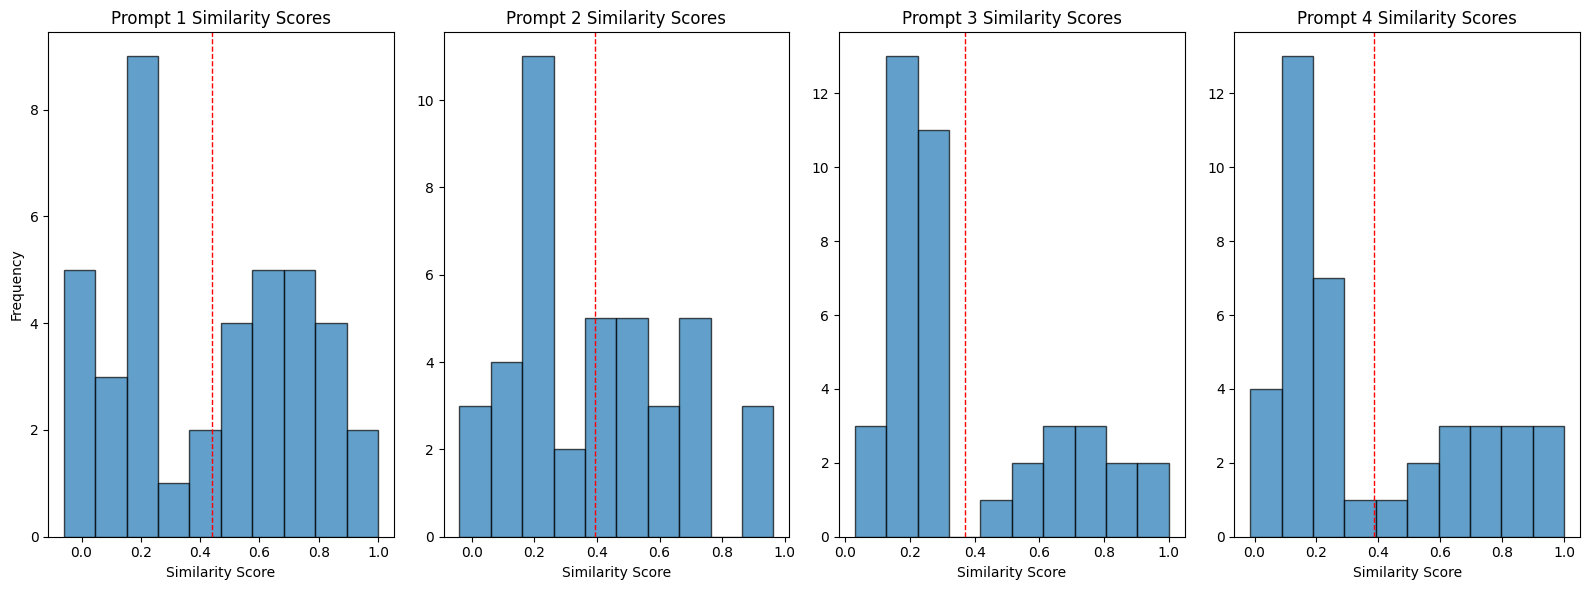

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Histogram for Prompt 1
plt.subplot(1, 4, 1)
plt.hist(prompt1['Semantic Similarity'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(prompt1['Semantic Similarity'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Prompt 1 Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')

# Histogram for Prompt 2
plt.subplot(1, 4, 2)
plt.hist(prompt2['Semantic Similarity'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(prompt2['Semantic Similarity'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Prompt 2 Similarity Scores')
plt.xlabel('Similarity Score')

# Histogram for Prompt 3
plt.subplot(1, 4, 3)
plt.hist(prompt3['Semantic Similarity'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(prompt3['Semantic Similarity'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Prompt 3 Similarity Scores')
plt.xlabel('Similarity Score')

# Histogram for Prompt 4
plt.subplot(1, 4, 4)
plt.hist(prompt4['Semantic Similarity'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(prompt4['Semantic Similarity'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Prompt 4 Similarity Scores')
plt.xlabel('Similarity Score')

plt.tight_layout()
plt.show()


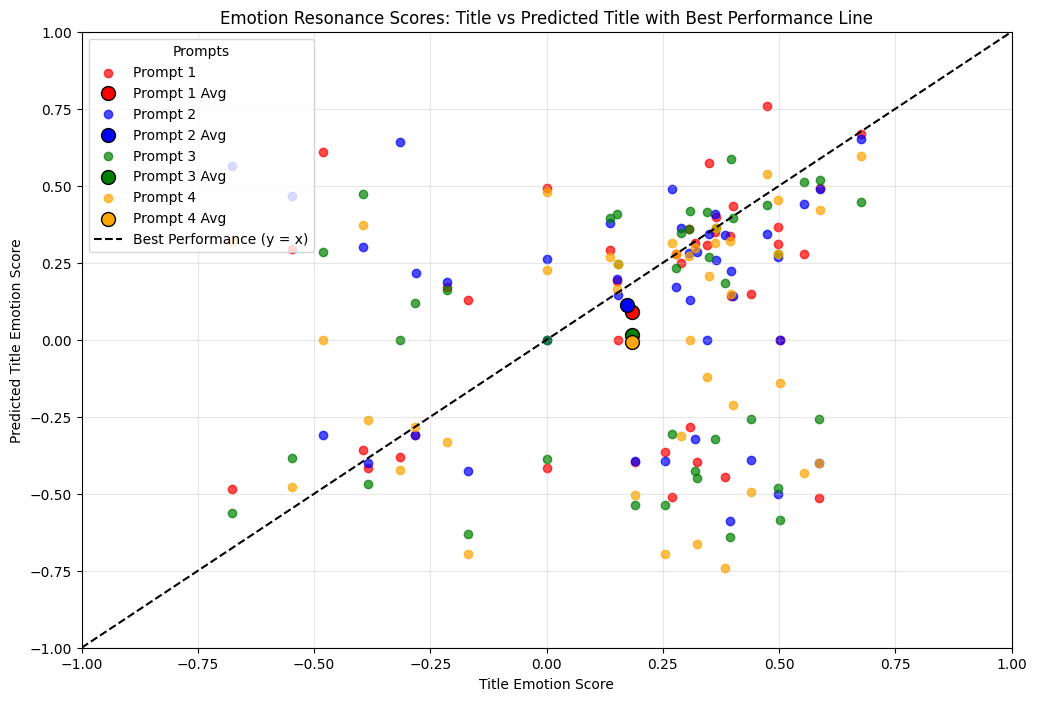

MAE for Prompt 1: 0.2997
MAE for Prompt 2: 0.3468
MAE for Prompt 3: 0.3719
MAE for Prompt 4: 0.3654


In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Scatter plot and average for Prompt 1
plt.scatter(prompt1['Title Emotion Score'], prompt1['Predicted Title Emotion Score'], alpha=0.7, label='Prompt 1', color='red')
plt.scatter(prompt1['Title Emotion Score'].mean(), prompt1['Predicted Title Emotion Score'].mean(),
            color='red', edgecolor='black', s=100, label='Prompt 1 Avg')

# Scatter plot and average for Prompt 2
plt.scatter(prompt2['Title Emotion Score'], prompt2['Predicted Title Emotion Score'], alpha=0.7, label='Prompt 2', color='blue')
plt.scatter(prompt2['Title Emotion Score'].mean(), prompt2['Predicted Title Emotion Score'].mean(),
            color='blue', edgecolor='black', s=100, label='Prompt 2 Avg')

# Scatter plot and average for Prompt 3
plt.scatter(prompt3['Title Emotion Score'], prompt3['Predicted Title Emotion Score'], alpha=0.7, label='Prompt 3', color='green')
plt.scatter(prompt3['Title Emotion Score'].mean(), prompt3['Predicted Title Emotion Score'].mean(),
            color='green', edgecolor='black', s=100, label='Prompt 3 Avg')

# Scatter plot and average for Prompt 4
plt.scatter(prompt4['Title Emotion Score'], prompt4['Predicted Title Emotion Score'], alpha=0.7, label='Prompt 4', color='orange')
plt.scatter(prompt4['Title Emotion Score'].mean(), prompt4['Predicted Title Emotion Score'].mean(),
            color='orange', edgecolor='black', s=100, label='Prompt 4 Avg')


x = np.linspace(-1, 1, 100)
plt.plot(x, x, color='black', linestyle='dashed', label='Best Performance (y = x)')

# Add labels, legend, and title
plt.xlabel('Title Emotion Score')
plt.ylabel('Predicted Title Emotion Score')
plt.title('Emotion Resonance Scores: Title vs Predicted Title with Best Performance Line')
plt.legend(title='Prompts', loc='upper left')
plt.grid(alpha=0.3)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

def calculate_mae(df):
    return np.mean(np.abs(df['Title Emotion Score'] - df['Predicted Title Emotion Score']))

mae_prompt1 = calculate_mae(prompt1)
mae_prompt2 = calculate_mae(prompt2)
mae_prompt3 = calculate_mae(prompt3)
mae_prompt4 = calculate_mae(prompt4)

print(f"MAE for Prompt 1: {mae_prompt1:.4f}")
print(f"MAE for Prompt 2: {mae_prompt2:.4f}")
print(f"MAE for Prompt 3: {mae_prompt3:.4f}")
print(f"MAE for Prompt 4: {mae_prompt4:.4f}")


In [162]:
prompt2['Predicted Title Emotion Score'].abs().mean()

0.3272945124928544

#### One more query to generate emotional title

In [85]:
df_1 = combined_df.sample(n=1)
df_1

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
5689,Lady Gaga,Fever,New Material (Mixtape),2006-10-06,there he goes my baby walks so slow sexual tictactoe yeah i know we both know it isn't time but would you be mmine we'll never get too far just you me and the bar so in a ménage à trois sometimes would you be mmine would you be mmine would you be mmine oh baby lights on but your mom's not home i'm sick of laying down alone with this fever fever yeah i want it all now i'm gonna get you alone give you a fever fever yeah there it goes you stole my soul and so 'cause sweetheart nononobody anonoknows they're occupied tell me you'll be mine let's get inside your car just you me and the stars kind of ménage à trois sometimes would you be mmine would you be mmine could you be mmine yeah oh baby lights on but your mom's not home i'm sick of laying down alone with this fever fever yeah i want it all now i'm gonna get you alone give you a fever fever yeah break yeah yeah yeah yeah yeah yeah yeah yeah yeah oh baby lights on but your mom's not home i'm sick of laying down alone with this fever fever yeah i want it all now i'm gonna get you alone give you a fever fever yeah fever fever yeah,2006.0,160.0


In [86]:
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
import ftfy
import unicodedata
import pandas as pd

model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

# Load the RoBERTa-based sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Step 1: Define the text normalization function
def robust_normalize_text(text):
    # Fix common symbols
    text = text.replace("&", "and").replace("@", "at")
    
    # Normalize Unicode characters (retain only letters and numbers)
    text = ''.join(
        char if unicodedata.category(char).startswith(('L', 'N')) else ' '
        for char in text
    )
    
    # Fix encoding issues
    text = ftfy.fix_text(text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

# Step 2: Define the sentiment scoring function using weighted sum
def emotion_score_weighted(sentiment_output):
    # Define weights for each star rating
    weights = {
        "1 star": -1.0,
        "2 stars": -0.5,
        "3 stars": 0.0,
        "4 stars": 0.5,
        "5 stars": 1.0
    }
    
    # Compute the weighted sum of scores
    continuous_score = sum(weights[item['label']] * item['score'] for item in sentiment_output)
    return continuous_score


# Step 3: Process the DataFrame for multiple prompts
def process_dataframe_separately(df, prompts):
    df_results = {} 

    for prompt_id, prompt_fixed in enumerate(prompts):
        print(f"Processing with Prompt {prompt_id + 1}/{len(prompts)}...")
        results = []
        for index, row in df.iterrows():
            try:
                artist = row['Artist']
                title = row['Title']
                lyrics = str(row['Lyric'])  

                prompt_tokens = len(prompt_fixed.split())
                available_tokens = 370 - prompt_tokens  # Ensure total tokens (prompt + lyrics) do not exceed 512

                # Truncate lyrics dynamically to fit within the context window
                tokens = lyrics.split()
                truncated_lyrics = " ".join(tokens[:available_tokens])

                # Combine the truncated lyrics with the prompt
                prompt = f"{prompt_fixed}\n\n{truncated_lyrics}\n\nTitle:"

                # Generate the title
                response = gemma_model(prompt, max_tokens=5)
                generated_title = response["choices"][0]["text"].strip()

                # Compute semantic similarity
                actual_embedding = model.encode(title, convert_to_tensor=True)
                predicted_embedding = model.encode(generated_title, convert_to_tensor=True)
                similarity_score = util.cos_sim(actual_embedding, predicted_embedding).item()

                # Perform sentiment analysis for the actual and predicted titles
                actual_sentiment_output = sentiment_analyzer(title)
                predicted_sentiment_output = sentiment_analyzer(generated_title)

                # Compute emotion scores for the actual and predicted titles using the weighted method
                actual_emotion_score = emotion_score_weighted(actual_sentiment_output)
                predicted_emotion_score = emotion_score_weighted(predicted_sentiment_output)

                # Store results in a dictionary
                result = {
                    'Artist': artist,
                    'Title': title,
                    'Predicted Title': generated_title,
                    'Semantic Similarity': similarity_score,
                    'Title Emotion Score': actual_emotion_score,
                    'Predicted Title Emotion Score': predicted_emotion_score
                }

                results.append(result)

            except Exception as e:
                print(f"Skipping row {index} due to error: {e}")

        df_results[f'Prompt_{prompt_id + 1}'] = pd.DataFrame(results)

    return df_results

prompts = [
    "Summarize the following and exaggerate:"
]

df_results_dict = process_dataframe_separately(df_1, prompts)

Device set to use cpu
Llama.generate: 12 prefix-match hit, remaining 281 prompt tokens to eval


Processing with Prompt 1/1...


llama_perf_context_print:        load time =   43418.73 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   281 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     4 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   23873.36 ms /   285 tokens


In [87]:
for prompt_name, df_result in df_results_dict.items():
    file_name = f"{prompt_name}_results_additionaly.csv"
    df_result.to_csv(file_name, index=False)
    print(f"Saved results for {prompt_name} to {file_name}")


Saved results for Prompt_1 to Prompt_1_results_additionaly.csv


In [88]:
pd.read_csv("Prompt_1_results_additionaly.csv")

,Artist,Title,Predicted Title,Semantic Similarity,Title Emotion Score,Predicted Title Emotion Score
0,Lady Gaga,Fever,Desperate Lust,0.263353,-0.371899,-0.293768


In [135]:
prompt4[['Artist', 'Title', 'Predicted Title', 'Title Emotion Score', 'Predicted Title Emotion Score']].sample(n=4)

,Artist,Title,Predicted Title,Title Emotion Score,Predicted Title Emotion Score
29,Dua Lipa,Six Feet Under,Not Available\nArtist,0.324201,-0.663398
36,Maroon 5,Payphone (No Rap Edit),One More Time\nArt,0.000000,0.479022
25,Katy Perry,Funky,"""My Wings""",0.362101,0.313495
14,Drake,God’s Plan (Demo),Bad Things\nArtist,0.383905,-0.741566


In [136]:
prompt4[['Artist', 'Title', 'Predicted Title', 'Title Emotion Score', 'Predicted Title Emotion Score']].iloc[[1, 19, 28, 14]]

,Artist,Title,Predicted Title,Title Emotion Score,Predicted Title Emotion Score
1,Taylor Swift,Closest To A Cowboy,Cowboy Caviar,0.394301,0.320776
19,Maroon 5,Let’s Stay Together,Stay With Me Baby,0.472858,0.537355
28,Lady Gaga,Million Reasons,Million Reasons,-0.282436,-0.282436
14,Drake,God’s Plan (Demo),Bad Things\nArtist,0.383905,-0.741566


In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define weights for each sentiment rating
weights = {
    "1 star": -1.0,
    "2 stars": -0.5,
    "3 stars": 0.0,
    "4 stars": 0.5,
    "5 stars": 1.0
}

def emotion_score_weighted(sentiment_output):
    return sum(weights[item['label']] * item['score'] for item in sentiment_output)

sentiment_output = sentiment_analyzer("First Love")
emotion_score = emotion_score_weighted(sentiment_output)

print(f"Sentiment Analysis Output: {sentiment_output}")
print(f"Emotional Resonance Score: {emotion_score}")


Device set to use cpu


Sentiment Analysis Output: [{'label': '5 stars', 'score': 0.5897011756896973}]
Emotional Resonance Score: 0.5897011756896973


In [149]:
d = {'Artist': ["Ed Sheeran", "Coldplay", "BTS"], 'Title': ["Homeless", "Glass of Water", "First Love"], 'Emotional Resonance Score': [-0.65, 0.12, 0.59]}
pd.DataFrame(d)

,Artist,Title,Emotional Resonance Score
0,Ed Sheeran,Homeless,-0.65
1,Coldplay,Glass of Water,0.12
2,BTS,First Love,0.59


In [159]:
d = {'Artist': ["Ed Sheeran", "Coldplay", "BTS"], 'Title': ["Homeless", "Glass of Water", "First Love"], 'Stars (score)': ["1 (0.65)", "4 (0.24)", "5 (0.59)"], 'Emotional Resonance Score': [-0.65, 0.12, 0.59]}
pd.DataFrame(d)

,Artist,Title,Stars (score),Emotional Resonance Score
0,Ed Sheeran,Homeless,1 (0.65),-0.65
1,Coldplay,Glass of Water,4 (0.24),0.12
2,BTS,First Love,5 (0.59),0.59


In [163]:
combined_df.sample(n=1)

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
10897,Post Malone,Myself,Hollywood’s Bleeding,2019-09-06,i wish i could've been there myself its what it is it's how i live all the places i've been i wish i couldve been there myself i made so much spent so much and i can't get enough i wish i could've been there myself wish i could've been there myself your second cousin lives in orlando orlando and yeah i just finished a show just finished a show people shoving shots down their damn throat some selling yes but i'm gonna say no gonna say no it's what it is it's how i live all the places i've been ive been i wish i couldve been there myself wish i could've been there myself i made so much spent so much and i cant get enough i can't get enough i wish i could've been there myself all of this american dreamin' everybodys sick of believin' oh let's not give a fuck 'til giving a fuck has no meaning oh i'm sick of believing all of this american dreaming oh let's not give a fuck 'til giving a fuck has no meaning oh it's what it is it's how i live all the places i've been i wish i could've been there myself wish i could've been there myself i made so much spent so much and i can't get enough no i can't get enough i wish i could've been there myself wish i could've been there myself no i can't get enough oh oh oh oh,2019.0,50.0
